<a href="https://colab.research.google.com/github/CarJung/ML/blob/main/Analiza_STAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nowa sekcja

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import os, os.path as op

In [3]:
d  =pd.read_csv('/tn3.csv')

# Czy znajomosc jezykow ger wplywa na zdolnosci jezykowe

In [4]:
d.head(10)

,Unnamed: 0,nr,lang,zdolnosc
0,0,1.0,Nie,57.0
1,1,2.0,Nie,11.0
2,2,3.0,Nie,24.0
3,3,4.0,Nie,27.0
4,4,5.0,Nie,53.0
5,5,6.0,Nie,46.0
6,6,7.0,Nie,1.0
7,7,8.0,Nie,31.0
8,8,9.0,Nie,67.0
9,9,10.0,Nie,45.0


In [10]:
d.describe()

,Unnamed: 0,nr,zdolnosc
count,65.00000,65.00000,65.000000
mean,32.00000,33.00000,41.107692
std,18.90767,18.90767,18.224402
min,0.00000,1.00000,1.000000
25%,16.00000,17.00000,30.000000
50%,32.00000,33.00000,39.000000
75%,48.00000,49.00000,53.000000
max,64.00000,65.00000,87.000000


In [15]:
stats = d.groupby(['lang']).zdolnosc.agg([np.mean, np.median, np.std ]).round(2).reset_index()

In [16]:
stats

,lang,mean,median,std
0,Nie,36.55,33.0,18.12
1,Tak,44.78,44.0,17.71


In [5]:
zna = d[d['lang'] == 'Tak']['zdolnosc']
nzna = d[d['lang'] == 'Nie']['zdolnosc']

In [6]:
zna.head()

29    62.0
30    33.0
31    66.0
32    12.0
33    21.0
Name: zdolnosc, dtype: float64

In [7]:
nzna.head()

0    57.0
1    11.0
2    24.0
3    27.0
4    53.0
Name: zdolnosc, dtype: float64

In [8]:
pg.ttest(zna, nzna)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.837889,59.48956,two-sided,0.071074,"[-0.73, 17.18]",0.459743,1.049,0.442214


p-val > 0.05 ---> wynik nie istotny statystycznie

<BarContainer object of 65 artists>

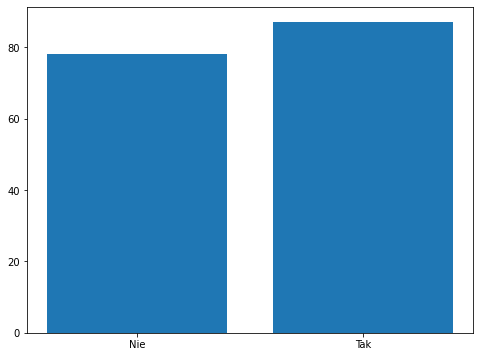

In [18]:
fig, ax = plt.subplots(figsize = (8,6))

# wykres najwyższych wartości
plt.bar(d['lang'], d['zdolnosc'])

<BarContainer object of 2 artists>

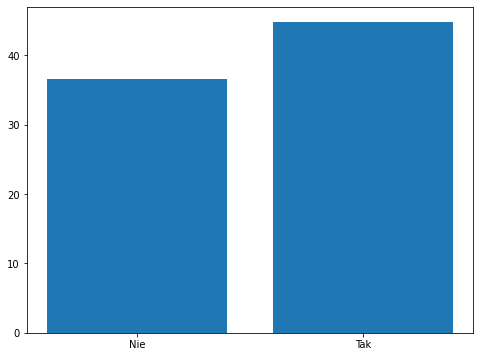

In [20]:
fig, ax = plt.subplots(figsize = (8,6))

#wykres średnich wartości
plt.bar(stats['lang'], stats['mean'])

In [32]:
colors = sns.color_palette('colorblind')

sns.color_palette(colors)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [59]:
font = {'family': 'Helvetica Neue', 
        'size': 17}


fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(x ='lang' , y='zdolnosc' , data = d , palette = colors, capsize = 0.2)

ax.set_xlabel('Znajmomosc jezyków germanskich', fontdict=font);
ax.set_ylabel('Zdolnosci jezykowe', fontdict=font);

ax.set_xticklabels(['Zna przynajmniej jeden język', 'Nie zna zadnego'])

ax.set_ylim(0,100);

from matplotlib import ticker
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax =100 ))

ax.grid(which = 'major', axis= 'y', ls = '--')

ax.yaxis.set_minor_locator(ticker.FixedLocator([25, 50 , 75]))
ax.grid(which='minor', axis='y', ls='-.')

if not op.exists('plots'):
  os.mkdir('plots')

plt.savefig(op.join('plots', 'plot1.png'), dp1 = 500, transparent = False)

plt.close()